In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
# from statistics import mean
# import pandas as pd
import math
import numpy.matlib
import csv

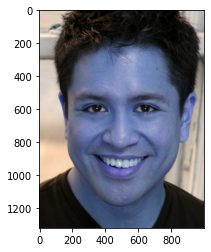

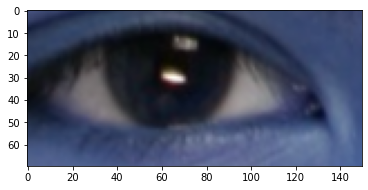

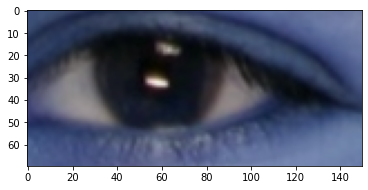

In [7]:
# eye detection
im = cv2.imread("../data/inputs/2187287549_74951db8c2_o.png")
plt.imshow(im)
plt.show()

file = open('../data/inputs/2187287549_74951db8c2_o.lm')

type(file)
csvreader = csv.reader(file)

model = np.zeros((66,2))
rows = []
i = 0
for row in csvreader:
    model[i] = row
    i = i + 1
model = np.array(model).astype(float)
leye_center = np.mean(model[37:42,: ],axis = 0)
leye_center = np.round(leye_center).astype(int)
reye_center = np.round(np.mean(model[43:48,:],axis = 0)).astype(int)

half_width = 75
half_height = 35

leye = im[leye_center[1] - half_height : leye_center[1] + half_height, leye_center[0] - half_width  : leye_center[0] + half_width,:]
plt.imshow(leye)
plt.show()
reye = im[reye_center[1] - half_height : reye_center[1] + half_height, reye_center[0] - half_width  : reye_center[0] + half_width,:]
plt.imshow(reye)
plt.show()


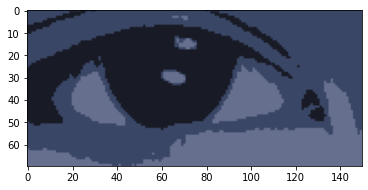

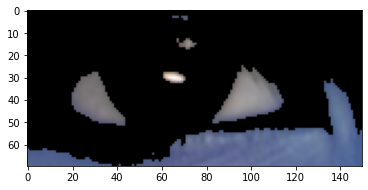

In [9]:
# eye segmentation
leftEye = leye.reshape((-1, 3))

leftEye1 = leftEye.astype('float32')
stop = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

k = 3
_, l, (centers) = cv2.kmeans(leftEye1, k, None, stop, 10, cv2.KMEANS_RANDOM_CENTERS)

centers = centers.astype('uint8')

l = l.flatten()
K_seg = centers[l]
K_seg = K_seg.reshape(leye.shape)

plt.imshow(K_seg)
plt.show()

leftEye2 = leftEye
# leftEye2[l == 0] = [0,0,0] 
leftEye2[l == 1] = [0,0,0]
leftEye2[l == 2] = [0,0,0] # eye
leftEye2 = leftEye2.reshape(leye.shape)
plt.imshow(leftEye2)
plt.show()